In [1]:
import json
import pandas as pd

In [2]:
adult_data = pd.read_json('final_adult_data.json', orient="split")
kids_data = pd.read_json('final_kids_data.json', orient="split")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
adult_train_data, adult_test_data = train_test_split(adult_data, test_size=0.3, random_state=66)
kids_train_data, kids_test_data = train_test_split(kids_data, test_size=0.3, random_state=66)

In [5]:
print("Adult 데이터:")
print("Train 데이터 개수:", len(adult_train_data))
print("Test 데이터 개수:", len(adult_test_data))

print("\nKids 데이터:")
print("Train 데이터 개수:", len(kids_train_data))
print("Test 데이터 개수:", len(kids_test_data))

Adult 데이터:
Train 데이터 개수: 23654
Test 데이터 개수: 10138

Kids 데이터:
Train 데이터 개수: 157
Test 데이터 개수: 68


In [6]:
# adult/kids test data concat
test_concatenated_data = pd.concat([adult_test_data, kids_test_data], ignore_index=True)

In [7]:
display(test_concatenated_data)

,food_name,ingredient_name,ingredient_gram,calorie,carbohydrate,protein,fat,category
0,소고기 산적,"[소고기, 쪽파, 진간장, 깨, 후추, 참기름, 물]","[500, 50, 2, 1, 1, 1, 1]",455.000000,9.000000,50.000000,27.000000,adult
1,훈제 오리,"[훈제오리, 양파, 양송이버섯, 마늘]","[250, 1, 1, 5]",0.540553,0.301318,0.218836,0.252576,adult
2,냉이 된장국,"[냉이, 달래, 된장, 마늘, 멸치, 다시마, 물]","[1, 20, 3, 1, 4, 3, 8]",87.000000,9.000000,7.000000,3.000000,adult
3,고들빼기 김치,"[고들빼기, 쪽파, 당근, 양파, 무, 천일염, 물, 다진마늘, 다진생강, 멸치액젓...","[10, 400, 1, 2, 300, 3, 10, 11, 1, 200, 200, 3...",38.270000,8.760000,4.500000,3.690000,adult
4,밀크 쉐이크,"[참외, 우유, 바닐라아이스크림, 아몬드]","[1, 100, 2, 5]",423.000000,64.000000,19.000000,19.000000,adult
...,...,...,...,...,...,...,...,...
10201,가지 나물 들깨 진밥,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 가지, 생것, 당근, 생것, 들...","[-1.0, -1.0, -1.0, -1.0, -1.0, 30.0, -1.0, 15....",153.699997,26.000000,3.700000,3.900000,child
10202,쇠고기 파래 진밥,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 쇠고기, 한우, 사태, 파래, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, 20.0, -1.0, -1....",144.699997,22.299999,12.300000,19.200001,child
10203,소고기 표고버섯 당근 죽,"[쌀, 소고기, 표고버섯, 당근]","[12.0, 5.0, 5.0, 4.0]",159.000000,11.300000,7.800000,1.000000,child
10204,쇠고기 파래 진밥,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 쇠고기, 한우, 사태, 파래, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, 20.0, -1.0, -1....",144.699997,22.299999,12.300000,19.200001,child


In [8]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

In [9]:
# adult_train_data["idx"] = ""
# kids_train_data["idx"] = ""

In [10]:
adult_train_dat = adult_train_data.reset_index()

In [11]:
kids_train_data = kids_train_data.reset_index()

In [12]:
display(kids_train_data)

,index,food_name,ingredient_name,ingredient_gram,calorie,carbohydrate,protein,fat,category
0,52,닭고기 시금치 그라탕,"[닭고기, 가슴살, 날것, 시금치, 생것, 노지, 당근, 생것, 양파, 생것, 국내...","[-1.0, -1.0, 30.0, -1.0, -1.0, 10.0, -1.0, 10....",117.599998,4.200000,11.700,6.0,child
1,21,달걀 노른자 죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 계란, 난황, 생것]","[-1.0, -1.0, -1.0, -1.0, -1.0, 20.0, -1.0, -1....",137.399994,15.500000,4.400,6.0,child
2,207,두부 닭 죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 쌀, 찹쌀, 백미, 닭고기, 가...","[-1.0, -1.0, -1.0, -1.0, -1.0, 15.0, -1.0, -1....",108.500000,16.200001,7.700,1.0,child
3,96,비트 사과 치즈 진밥,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 비츠, 생것, 사과, 생과, 부...","[-1.0, -1.0, -1.0, -1.0, -1.0, 20.0, -1.0, 20....",152.399994,21.500000,5.400,5.0,child
4,108,소고기 브로콜리 미음,"[쌀, 소고기, 브로콜리]","[5.0, 10.0, 5.0]",226.500000,5.500000,31.100,8.0,child
...,...,...,...,...,...,...,...,...,...
152,122,고구마 두부 죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 고구마, 생것, 두부, 두부]","[-1.0, -1.0, -1.0, -1.0, -1.0, 25.0, -1.0, 5.0...",117.099998,21.600000,4.200,1.2,child
153,51,닭고기 시금치 그라탕,"[닭고기, 가슴살, 날것, 시금치, 생것, 노지, 당근, 생것, 양파, 생것, 국내...","[-1.0, -1.0, 30.0, -1.0, -1.0, 10.0, -1.0, 10....",117.599998,4.200000,11.700,6.0,child
154,119,가지 나물 들깨 진밥,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 가지, 생것, 당근, 생것, 들...","[-1.0, -1.0, -1.0, -1.0, -1.0, 30.0, -1.0, 15....",153.699997,26.000000,3.700,3.9,child
155,60,소고기 아욱 감자 죽,"[쌀, 소고기, 아욱, 감자]","[6.0, 5.0, 3.0, 3.0]",130.600000,6.195000,5.855,1.0,child


In [13]:
target_column_name = kids_train_data.columns[0]

In [14]:
display(target_column_name)

'index'

In [16]:
numeric_columns = kids_train_data.select_dtypes(include=['number']).drop([target_column_name], axis=1).columns
x = kids_train_data[numeric_columns]
y = kids_train_data[target_column_name]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [19]:
resampled_data = pd.DataFrame(x_resampled, columns=numeric_columns)
resampled_data.insert(0, target_column_name, y_resampled)

In [20]:
oversampled_data = resampled_data.sample(n=len(adult_train_data), replace=True, random_state=42)

In [21]:
display(oversampled_data)

,index,calorie,carbohydrate,protein,fat
102,86,132.000000,6.500000,10.750,4.00
51,98,152.399994,21.500000,5.400,5.00
92,207,108.500000,16.200001,7.700,1.00
14,209,108.500000,16.200001,7.700,1.00
106,184,83.250000,4.750000,2.370,2.75
...,...,...,...,...,...
18,62,92.000000,5.800000,4.700,1.00
68,15,137.399994,15.500000,4.400,6.00
24,61,130.600000,6.195000,5.855,1.00
10,155,106.800003,17.400000,7.300,0.50


In [24]:
kids = kids_train_data
over = oversampled_data

# kids = kids_train_data.rename(columns={"index" : "idx"})
# over = oversampled_data.rename(columns={"index" : "idx"})

In [25]:
temp = pd.merge(over, kids)

In [26]:
display(temp)

,index,calorie,carbohydrate,protein,fat,food_name,ingredient_name,ingredient_gram,category
0,86,132.0,6.50,10.75,4.0,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",child
1,86,132.0,6.50,10.75,4.0,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",child
2,86,132.0,6.50,10.75,4.0,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",child
3,86,132.0,6.50,10.75,4.0,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",child
4,86,132.0,6.50,10.75,4.0,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",child
...,...,...,...,...,...,...,...,...,...
23649,32,107.0,21.45,2.98,0.0,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",child
23650,32,107.0,21.45,2.98,0.0,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",child
23651,32,107.0,21.45,2.98,0.0,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",child
23652,32,107.0,21.45,2.98,0.0,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",child


In [29]:
temp.drop(columns=['index'], inplace=True)

In [30]:
temp.insert(0, 'food_name', temp.pop('food_name'))
temp.insert(1, 'ingredient_name', temp.pop('ingredient_name'))
temp.insert(2, 'ingredient_gram', temp.pop('ingredient_gram'))

In [31]:
display(temp)

,food_name,ingredient_name,ingredient_gram,calorie,carbohydrate,protein,fat,category
0,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",132.0,6.50,10.75,4.0,child
1,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",132.0,6.50,10.75,4.0,child
2,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",132.0,6.50,10.75,4.0,child
3,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",132.0,6.50,10.75,4.0,child
4,소고기 배 미음,"[쌀, 소고기, 배]","[7.5, 5.0, 3.5]",132.0,6.50,10.75,4.0,child
...,...,...,...,...,...,...,...,...
23649,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.0,21.45,2.98,0.0,child
23650,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.0,21.45,2.98,0.0,child
23651,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.0,21.45,2.98,0.0,child
23652,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.0,21.45,2.98,0.0,child


In [42]:
train_concatenated_data = pd.concat([adult_train_data, temp], ignore_index=True)

In [43]:
display(train_concatenated_data)

,food_name,ingredient_name,ingredient_gram,calorie,carbohydrate,protein,fat,category
0,마늘쫑 볶음,"[마늘쫑, 간장, 물엿, 식용유, 땡초, 물]","[1, 4, 2, 1, 3, 3]",126.000000,21.000000,7.000000,6.000000,adult
1,롤 케이크,"[달걀, 설탕, 박력분, 우유, 아몬드 프랄리네, 커스터드 크림]","[5, 120, 120, 25, 85, 225]",314.000000,47.000000,10.000000,14.000000,adult
2,달래 된장 찌개,"[무, 애호박, 감자, 새송이버섯, 달래, 대파, 고추, 양파, 두부, 막장, 다시...","[350, 1, 1, 2, 150, 2, 1, 1, 1, 6, 3, 5]",128.700000,19.320000,17.120000,8.770000,adult
3,모카 빵,"[강력분, 황설탕, 이스트, 소금, 계란, 우유, 부블스틱, 버터, 견과류, 흑설탕...","[150, 25, 3, 2, 25, 65, 3, 15, 35, 18, 1, 1]",509.000000,88.000000,14.000000,14.000000,adult
4,열무 김치,"[열무, 사과, 양파, 고추, 감자, 밑국물, 대파, 다진마늘, 고추가루, 멸치액젓...","[1, 1, 1, 8, 2, 1, 1, 3, 4, 5, 2, 3, 4]",0.675498,0.638854,0.541319,0.960341,adult
...,...,...,...,...,...,...,...,...
47303,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.000000,21.450000,2.980000,0.000000,child
47304,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.000000,21.450000,2.980000,0.000000,child
47305,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.000000,21.450000,2.980000,0.000000,child
47306,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.000000,21.450000,2.980000,0.000000,child


In [47]:
import numpy as np
from tensorflow import keras
from keras.layers import Input, Dense, concatenate, Dropout
from keras.models import Model, load_model
from keras.activations import relu, sigmoid
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from keras.metrics import sparse_categorical_accuracy, binary_accuracy
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score

In [48]:
from matplotlib import pyplot as plt

def showHistory(history):
    
    fig, (loss, accuracy) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    loss.plot(history.epoch, history.history["loss"], label="train")
    loss.plot(history.epoch, history.history["val_loss"], label = "val")
    loss.legend()
    loss.set_title("Loss")
    
    accuracy.plot(history.epoch, history.history["binary_accuracy"], label="train")
    accuracy.plot(history.epoch, history.history["val_binary_accuracy"], label="val")
    accuracy.legend()
    accuracy.set_title("Accuracy")
    
    plt.xlim(history.epoch[0], history.epoch[-1])
    plt.tight_layout()
    plt.show()

In [57]:
nutrients_input = Input(shape=(4, ), name="nutrient_input")
nutrients_dense1 = Dense(16, activation=relu, name = "nutrient_dense_1")(nutrients_input)
nutrients_dense2 = Dense(32, activation=relu, name = "nutrient_dense_2")(nutrients_dense1)
nutrients_dense3 = Dense(64, activation=relu, name = "nutrient_dense_3")(nutrients_dense2)

ingredient_gram_input = Input(shape=(25, ), name="ingredient_gram_input")
ingredient_gram_dense1 = Dense(32, activation=relu, name="ingredient_gram_dense_1")(ingredient_gram_input)
ingredient_gram_dense2 = Dense(64, activation=relu, name="ingredient_gram_dense_2")(ingredient_gram_input)

ingredient_exist_input = Input(shape=(18, ), name = "ingredient_exist_input")
ingredient_exist_dense1 = Dense(32, activation=relu, name = "ingredient_exist_dense_1")(ingredient_exist_input)
ingredient_exist_dense2 = Dense(64, activation=relu, name = "ingredient_exist_dense_2")(ingredient_exist_dense1)

merge = concatenate([nutrients_dense3, ingredient_gram_dense2, ingredient_exist_dense2], name="merge_nutrient_gram_exist")
merge_dense1 = Dense(128, activation=relu, name = "merge_dense_1")(merge)
merge_dropout1 = Dropout(0.5)(merge_dense1)
merge_dense2 = Dense(64, activation=relu, name = "merge_dense_2")(merge_dropout1)
merge_dropout2 = Dropout(0.5)(merge_dense2) 
merge_dense3 = Dense(32, activation=relu, name = "merge_dense_3")(merge_dropout2)
output = Dense(1, activation=sigmoid, name="classifier")(merge_dense3)

model = Model(inputs = [nutrients_input, ingredient_gram_input, ingredient_exist_input], outputs = output)
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=[binary_accuracy])

model.summary()
plot_model(model, show_layer_activations=True, show_shapes=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nutrient_input (InputLayer)    [(None, 4)]          0           []                               
                                                                                                  
 nutrient_dense_1 (Dense)       (None, 16)           80          ['nutrient_input[0][0]']         
                                                                                                  
 ingredient_exist_input (InputL  [(None, 18)]        0           []                               
 ayer)                                                                                            
                                                                                                  
 nutrient_dense_2 (Dense)       (None, 32)           544         ['nutrient_dense_1[0][0]'] 

In [44]:
def find_indices(a, b):
    result_indices = []

    for value in b:
        if value in a:
            index = a.index(value)
            result_indices.append(index)
        else:
            result_indices.append(-1)

    return result_indices

def dataTransform(data):
    by_gram = ["시금치", "수수", "미역", "요구르트", "양배추", "찹쌀", "전분", "콩나물", "단호박", "밀가루", "쌀가루", "파프리카", "청경채", "호두", "파", "들깨가루", "김", "중력분", "가지", "적채", "건포도", "흑ㅁ;", "밤", "멸치", "부추"]
    by_exist = ["설탕", "참기름", "고추", "소금", "마늘", "다진마늘", "고춧가루", "양파", "달걀", "간장", "올리고당", "생강", "깨소금", "우유", "식초", "맛술", "매실청", "후추"]
    
    ingredient_gram = []

    for idx in find_indices(list(data["ingredient_name"]), by_gram):
        if(idx != -1):
            ingredient_gram.append(data["ingredient_gram"][idx])
        
        else:
            ingredient_gram.append(0)
            
    ingredient_exist = []

    for idx in find_indices(list(data["ingredient_name"]), by_exist):
        if(idx != -1):
            ingredient_exist.append(1)
        
        else:
            ingredient_exist.append(0)
    
    return [data["calorie"], data["carbohydrate"], data["protein"], data["fat"]], ingredient_gram, ingredient_exist, data["category"]

In [55]:
def process(data):
    nutrients = []
    ingredient_gram = []
    ingredient_exist = []
    category = []
    
    for row in data.iterrows():
        n, g, e, c = dataTransform(row[1])
        nutrients.append(np.array(n))
        ingredient_gram.append(np.array(g))
        ingredient_exist.append(np.array(e))
        category.append(c)
    
    nutrients = np.array(nutrients)
    ingredient_gram = np.array(ingredient_gram)
    ingredient_exist = np.array(ingredient_exist)
    
    return [nutrients, ingredient_gram, ingredient_exist], np.array(list(map(lambda x : 0 if x == "child" else 1, category)))

In [56]:
train_input, train_output = process(train_concatenated_data)
test_input, test_output = process(test_concatenated_data)

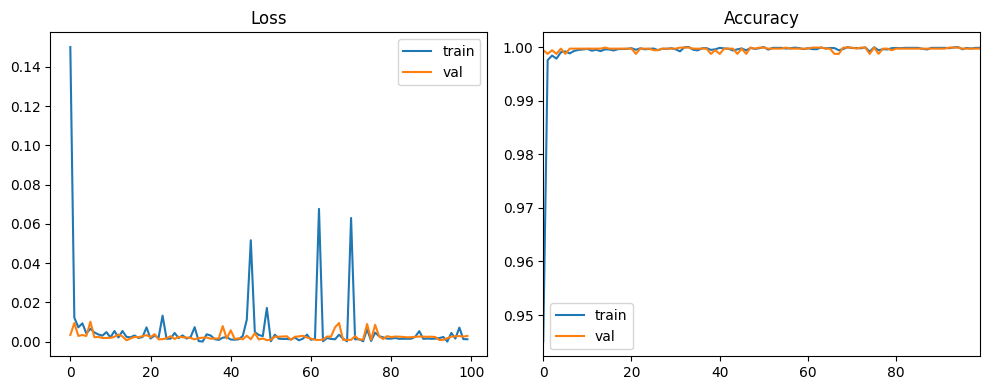

In [58]:
history = model.fit(train_input, train_output, validation_data=(test_input, test_output), epochs=100, verbose=0)
showHistory(history)

In [59]:
model.evaluate(test_input, test_output)

319/319 [==============================] - 1s 2ms/step - loss: 0.0029 - binary_accuracy: 0.9997


[0.002892073942348361, 0.9997060298919678]